<img src="https://www.nimbous.co/wp-content/uploads/2019/07/scikit-learn-logo-1024x300.png" />

In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [2]:
# standard imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
# Get the data Ready
heart_disease = pd.read_csv('./scikit-learn-data/heart-disease.csv')

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Create X ( features matrix )
x = heart_disease.drop( 'target' , axis=1 )

# Create Y ( Labels) 
y = heart_disease['target']

In [6]:
# choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 100)

# keep the default hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# fit the model to the training data 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

In [8]:
clf.fit(x_train , y_train );

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2


In [10]:
# make a prediction 
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [11]:
y_test

207    0
180    0
251    0
70     1
49     1
      ..
31     1
14     1
72     1
221    0
273    0
Name: target, Length: 61, dtype: int64

In [12]:
# Evaluate the model on the training data and test data
clf.score(x_train , y_train )
# Return the mean accuracy on the given test data and labels.

1.0

In [13]:
clf.score( x_test , y_test )

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print( classification_report( y_test , y_preds ) )

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix( y_test , y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [16]:
accuracy_score( y_test , y_preds )

0.8360655737704918

In [17]:
# improve a model 
# try different amount of n_estimators
np.random.seed(42)
for i in range(10 ,100 , 10):
    print(f"trying the model with {i} estimators " )
    clf = RandomForestClassifier(n_estimators=i ).fit(x_train , y_train)
    print(f" Model accuracy on test set: {clf.score( x_test , y_test ) * 100:2f}% " )
    print(" ")

trying the model with 10 estimators 
 Model accuracy on test set: 78.688525% 
 
trying the model with 20 estimators 
 Model accuracy on test set: 80.327869% 
 
trying the model with 30 estimators 
 Model accuracy on test set: 86.885246% 
 
trying the model with 40 estimators 
 Model accuracy on test set: 81.967213% 
 
trying the model with 50 estimators 
 Model accuracy on test set: 85.245902% 
 
trying the model with 60 estimators 
 Model accuracy on test set: 88.524590% 
 
trying the model with 70 estimators 
 Model accuracy on test set: 83.606557% 
 
trying the model with 80 estimators 
 Model accuracy on test set: 86.885246% 
 
trying the model with 90 estimators 
 Model accuracy on test set: 85.245902% 
 


In [18]:
# save the model 
import pickle 

# pickle.dump( clf , open("random_forst_model_1.pkl " , "wb") )

In [19]:
loaded_model = pickle.load(open("random_forst_model_1.pkl" , "rb") )
loaded_model.score( x_test , y_test )

1.0

## Getting our data ready to be used with machine learning

Three main things we have to do:

1. **Split the data into features and labels** (usually X & y)
   
2. **Filling** (also called imputing) **or disregarding missing values**
   
3. **Converting non-numerical values to numerical values** (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = heart_disease.drop( 'target' , axis=1 )
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# split the data into training and test sets 
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x ,
                                                       y ,
                                                       test_size=0.3) 

In [24]:
x_train.shape  , x_test.shape , y_train.shape , y_test.shape 

((212, 13), (91, 13), (212,), (91,))

In [25]:
x.shape[0] * 0

0

In [26]:
len( heart_disease )

303

## Make sure it`s all numerical 

In [27]:
car_sales = pd.read_csv("./scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [32]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
# Another way to do it with pd.dummies 
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies = dummies.astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
# refit the model 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split( transformed_X ,
                                                   y ,
                                                   test_size=0.2)
model.fit(X_train ,y_train )

RandomForestRegressor()

In [39]:
model.score(X_test,y_test)

0.3235867221569877

In [40]:
import sklearn
print(sklearn.__version__)


1.3.0


**Handle missing values**:
   - **Fill them with some value** (also known as imputation)
   - **Remove the samples with missing data altogether**

In [41]:
# import the care sales missing Data 
car_sales_missing = pd.read_csv('./scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# create X & Y 
x1 = car_sales_missing.drop('Price' , axis=1)
x1.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [44]:
y1 = car_sales_missing['Price']
y1.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [45]:
# convert the data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(x1)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [46]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


## Fill the missing data with pandas

In [47]:
car_sales_missing['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [48]:
# fill the 'make' column 
car_sales_missing['Make'].fillna('missing' , inplace=True)
# fill the colour column 
car_sales_missing['Colour'].fillna('missing' , inplace=True)
# fill the `Odometer (KM) ` column 
car_sales_missing['Odometer (KM)'].fillna( car_sales_missing['Odometer (KM)'].mean() , inplace=True)
# fill the Doors column 
car_sales_missing['Doors'].fillna(4 , inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
# remove rows with missing price value 
car_sales_missing.dropna(inplace=True)

In [51]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
len(car_sales_missing)

950

In [53]:
# create X & Y 
x1 = car_sales_missing.drop('Price' , axis=1)
x1.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [54]:
y1 = car_sales_missing['Price']
y1.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [55]:
# convert the data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 fill the mising values with SkLearn

In [56]:
car_sales_missing2 = pd.read_csv('./scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [57]:
car_sales_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
# Drop the rows with no labels
car_sales_missing2.dropna(subset=['Price'] , inplace=True )
car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
# split into X & Y 
x2 = car_sales_missing2.drop( 'Price' , axis=1 )
x2.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [60]:
y2 = car_sales_missing2['Price']
y2.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [61]:
# fill missing value with Sklearn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# fill the categorical values with 'missing' & numerical values with mean 
cat_imputer = SimpleImputer( strategy='constant' , fill_value='missing'  )
door_imputer = SimpleImputer( strategy='constant' , fill_value=4 )
num_imputer = SimpleImputer( strategy='mean' )

# Define columns 
cat_features = [ 'Make' ,'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create imputer ==> to to fill the missing data 
imputer = ColumnTransformer([
    ('cat_imputer' , cat_imputer , cat_features),
    ('door_imputer' , door_imputer , door_features),
    ('num_imputer' , num_imputer , num_features )
])

# Transform the data 
filled_x = imputer.fit_transform(x2)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [62]:
car_sales_filled = pd.DataFrame(filled_x ,
                               columns=['Make' , 'Colour' , 'Doors' , 'Odometer (KM)' ] )
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
# convert the data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X2 = transformer.fit_transform( car_sales_filled )
transformed_X2

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [65]:
# now we`ve got our data as numbers and filled (no missing values )
# let`s fit the model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(transformed_X2 , 
                                                      y2 , 
                                                      test_size=0.2 )

model = RandomForestRegressor( n_estimators=100 )
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.21990196728583944

In [66]:
len(car_sales_filled) , len(car_sales)

(950, 1000)

# Choosing the right estimator 

<img src='https://scikit-learn.org/stable/_static/ml_map.png' />

 # Choosing the Right Estimator/Algorithm for Your Problem

## The Art of Selecting the Perfect Model

In the vast landscape of machine learning, navigating through the myriad of algorithms can be akin to traversing a dense jungle without a compass. Fear not, for sklearn offers a map—a guiding light illuminating the path to the ideal estimator for your specific task.

### Deciphering the Terrain

Before embarking on our journey, it's crucial to understand the lay of the land. In the realm of sklearn, estimators are the pillars upon which our models stand tall. For classification endeavors—divining whether a patient suffers from heart disease or not—we harness the power of classifiers, often affectionately abbreviated as `clf`. Conversely, in the realm of regression—predicting the selling price of a car—we seek algorithms adept at forecasting numerical values with precision.

### Navigating with Sklearn's Machine Learning Map

When faced with the daunting task of selecting the optimal model for a regression conundrum, we turn to Sklearn's venerable Machine Learning Map. This cartographic marvel lays out a clear path amidst the tangled undergrowth of algorithms, guiding us to our destination with grace and efficiency. Behold its majesty: [Sklearn Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

#### 2.1 A Quest for the Ideal Regression Model

Our odyssey commences with the California Housing dataset—a treasure trove of real estate insights ripe for exploration. This dataset, a testament to the allure of the Golden State, beckons us to uncover its secrets and extract valuable knowledge.

[California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

As we embark on our expedition, armed with Sklearn's guidance and fortified by our determination, we shall navigate the labyrinth of algorithms and emerge victorious, wielding the perfect model to tame the untamed wilderness of regression.

Let us forge ahead, intrepid explorers, for the realm of machine learning awaits, eager to reveal its mysteries to those bold enough to seek them.


In [67]:
# California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [69]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [70]:
housing_df = pd.DataFrame(housing['data'] , columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [74]:
housing_df = housing_df.drop('MedHouseVal' , axis=1 )
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [75]:
# import Algorithm 
from sklearn.linear_model import Ridge
# setup Random seed 
np.random.seed(42)
# create the data ( X & Y  )
X = housing_df.drop('target' , axis=1)
Y = housing_df['target'] # Median house price in $100.000

# split the data and test sets 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, Y_train )

# check the score of the model (on the test set )
model.score(X_test , Y_test)


0.5758549611440126

In [76]:
# import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# setup Random seed 
np.random.seed(42)
# create the data ( X & Y  )
X = housing_df.drop('target' , axis=1)
Y = housing_df['target'] # Median house price in $100.000

# split the data and test sets 
X_train , X_test , Y_train , Y_test = train_test_split(X ,
                                                       Y ,
                                                       test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, Y_train )

# check the score of the model (on the test set )
model.score(X_test , Y_test)


0.8065734772187598

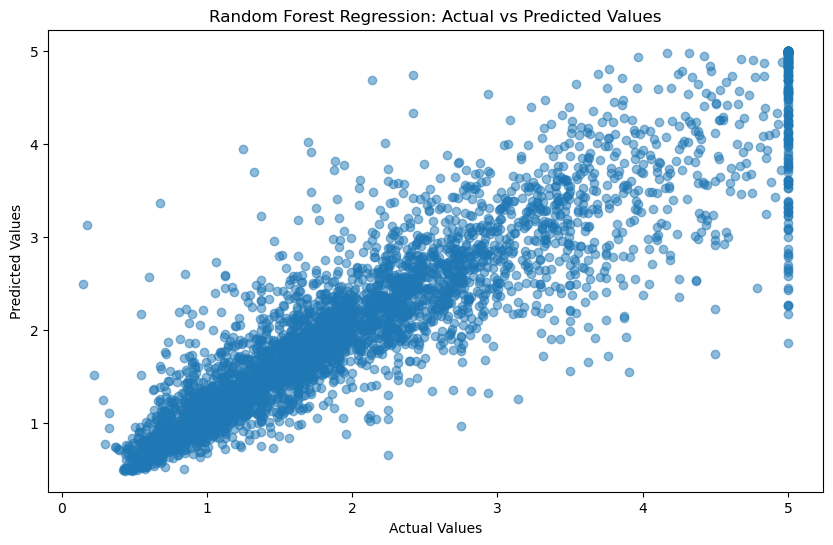

In [84]:
import matplotlib.pyplot as plt

# Predict on the test set
Y_pred = model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.show()


# Choosing an estimator for a Classification problem

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
len(heart_disease)

303

# Consulting the map and its say to try `LinearSVC`

In [87]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC 
# Setup random seed 
np.random.seed(42)
# make the data  X & Y
x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

# split the data and test sets 
x_train , x_test , y_train , y_test = train_test_split( x,
                                                      y,
                                                      test_size=0.2)
# Instantiate and fit the model (on the training set)
model2 = LinearSVC()
model2.fit(x_train , y_train)

# check the score
model2.score(x_test , y_test)


0.8688524590163934

In [88]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [89]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
# Setup random seed 
np.random.seed(42)
# make the data  X & Y
x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

# split the data and test sets 
x_train , x_test , y_train , y_test = train_test_split( x,
                                                      y,
                                                      test_size=0.2)
# Instantiate and fit the model (on the training set)
model3 = RandomForestClassifier()
model3.fit(x_train , y_train)

# check the score
model3.score(x_test , y_test)


0.8524590163934426